<div style="border:1px solid #000; border-radius:1px; background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:3px; border-radius:1px; background:#2F6966; text-align:center;">
        <span style="font-family:sans-serif; font-size:45px; color:#fff;">Analysis of variance (ANOVA)</span>
    </div>
</div>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2F6966;font-family:sans-serif;color:#fff;font-size:170%;text-align:center;border-radius:1px 1px;"> Introduction</p>

<div style="border:1px solid blue; border-radius:10px; padding:2px">
    <img src="https://media.geeksforgeeks.org/wp-content/uploads/20201111175412/custom.png" width="100%">
</div>
<div style="padding:4px">

## Analysis of variance

ANOVA is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among means. ANOVA was developed by the statistician Ronald Fisher. ANOVA is based on the law of total variance, where the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means. In other words, the ANOVA is used to test the difference between two or more means.

As we know, T-Tests aim to test whether the means of two groups are different from each other at the population level. That is, thanks to these tests, we can get information about the average of two groups. But in real life, we are often faced with the need to compare the averages of more than two groups. The ANOVA is a statistical inference test that lets you compare multiple groups at the same time. For instance, if we wanted to test whether voter age differs based on some categorical variable like race, we have to compare the means of each level or group the variable.


### One-Way ANOVA

#### What do we mean when we say one-way ANOVA?

One-way ANOVA is a type of statistical test that compares the variance in group means within a sample, considering only one independent variable or factor. It is a hypothesis-based test, meaning it aims to evaluate multiple mutually exclusive theories about our data.

#### When would we use a one-way ANOVA?

Use one-way ANOVA when you collect data about a categorical independent variable and a quantitative dependent variable. The independent variable must have at least three levels (ie at least three different groups or categories). The only difference between one-way and two-way ANOVA is the number of independent variables. A one-way ANOVA has one independent variable, while a two-way ANOVA has two. 

In the case of the ANOVA, **we will use the [f-distribution](https://en.wikipedia.org/wiki/F-distribution).**

### References and further reading:

https://en.wikipedia.org/wiki/Analysis_of_variance

https://www.technologynetworks.com/informatics/articles/one-way-vs-two-way-anova-definition-differences-assumptions-and-hypotheses-306553

https://www.scribbr.com/statistics/one-way-anova/

> <div class="alert alert-block alert-warning">
<b>Business problem:</b> The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. For example, testing the relationship between shoe brand (Nike, Adidas, Saucony, Hoka) and race finish times in a marathon.</div>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2F6966;font-family:sans-serif;color:#fff;font-size:170%;text-align:center;border-radius:1px 1px;"> Import the necessary libraries</p>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Create random data for one-way ANOVA test

In [2]:
np.random.seed(11)

shoe_brand_names = ["nike", "adidas", "saucony", "hoka", "converse", "puma", "timberland"]

# p - The probabilities associated with each entry in a
# if p is not given, the sample assumes a uniform distribution over all

shoe_brands = np.random.choice(a = shoe_brand_names,
                               p = [0.05, 0.13 ,0.25, 0.05, 0.3, 0.2, 0.02],
                               size = 5000)

marathon_times = stats.poisson.rvs(loc = 18, mu = 30, size = 5000)

## Group marathon_times data by shoe_brand_names

In [3]:
marathon_frame = pd.DataFrame({"shoe" : shoe_brands, "marathon" : marathon_times})
marathon_frame

,shoe,marathon
0,saucony,40
1,nike,64
2,hoka,46
3,converse,58
4,saucony,50
...,...,...
4995,converse,52
4996,saucony,51
4997,adidas,38
4998,saucony,48


In [4]:
groups = marathon_frame.groupby("shoe").groups

## Extract individual groups

In [5]:
nike = marathon_times[groups["nike"]]
adidas = marathon_times[groups["adidas"]]
saucony = marathon_times[groups["saucony"]]
hoka = marathon_times[groups["hoka"]]
converse = marathon_times[groups["converse"]]
puma = marathon_times[groups["puma"]]
timberland = marathon_times[groups["timberland"]]

## Conduct a one-way ANOVA test in Python

### <span style='background:yellow;color:#000000;'>Our hyphothesis for one-way ANOVA test:</span>

#### <span style='background:red;color:#ffffff;'>Null hypothesis: there is no significant difference between the group means</span>

#### <span style='background:red;color:#ffffff;'>Alternative hypothesis: there is significant difference between the group means</span>

In [6]:
stats.f_oneway(nike, adidas, saucony, hoka, converse, puma, timberland)

F_onewayResult(statistic=1.0545716280465174, pvalue=0.38768383569947124)

## One-way ANOVA test by using statsmodels library

In [7]:
model = ols('marathon ~ shoe',                
            data = marathon_frame).fit()
                
anova_result = sm.stats.anova_lm(model, typ = 2)
print(anova_result)

                 sum_sq      df         F    PR(>F)
shoe         187.079498     6.0  1.054572  0.387684
Residual  147625.176302  4993.0       NaN       NaN


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2F6966;font-family:sans-serif;color:#fff;font-size:170%;text-align:center;border-radius:1px 1px;"> Conclusion</p>

> <div class="alert alert-block alert-success">
<b>Result:</b> Given that the p_value (0.387) is higher than 0.05, we fail to reject the H0 hypothesis. That is, there is no significant difference between the group means.  As can be seen, we obtained the same p_value and f_statistic (1.054) with the statsmodels library as with the scipy library</div>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2F6966;font-family:sans-serif;color:#fff;font-size:170%;text-align:center;border-radius:1px 1px;"> Now we will do new marathon times data where the group is different and then will run a second ANOVA</p>

## Create random data for a second one-way ANOVA test

In [8]:
np.random.seed(11)

shoe_brands = np.random.choice(a = shoe_brand_names,
                               p = [0.05, 0.13 ,0.25, 0.05, 0.3, 0.2, 0.02],
                               size = 5000)

adidas_marathon = stats.poisson.rvs(loc = 18, mu = 32, size = 5000)
marathon_times = stats.poisson.rvs(loc = 18, mu = 30, size = 5000)
marathon_times = np.where(shoe_brands == "adidas", adidas_marathon, marathon_times)

marathon_frame = pd.DataFrame({"shoe" : shoe_brands, "marathon" : marathon_times})
groups = marathon_frame.groupby("shoe").groups

## Extract individual groups and do a second one-way ANOVA test

### <span style='background:yellow;color:#000000;'>Our hyphothesis for one-way ANOVA test:</span>

#### <span style='background:red;color:#ffffff;'>Null hypothesis: there is no significant difference between the group means</span>

#### <span style='background:red;color:#ffffff;'>Alternative hypothesis: there is significant difference between the group means</span>

In [9]:
nike = marathon_times[groups["nike"]]
adidas = marathon_times[groups["adidas"]]
saucony = marathon_times[groups["saucony"]]
hoka = marathon_times[groups["hoka"]]
converse = marathon_times[groups["converse"]]
puma = marathon_times[groups["puma"]]
timberland = marathon_times[groups["timberland"]]

stats.f_oneway(nike, adidas, saucony, hoka, converse, puma, timberland)

F_onewayResult(statistic=16.140575626102837, pvalue=1.7493012888568482e-18)

## A second one-way ANOVA test by using statsmodels library

In [10]:
model = ols('marathon ~ shoe',                
            data = marathon_frame).fit()
                
anova_result = sm.stats.anova_lm(model, typ = 2)
print(anova_result)

                 sum_sq      df          F        PR(>F)
shoe        2875.823303     6.0  16.140576  1.749301e-18
Residual  148270.070897  4993.0        NaN           NaN


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2F6966;font-family:sans-serif;color:#fff;font-size:170%;text-align:center;border-radius:1px 1px;"> Conclusion for a second one-way ANOVA test</p>

> <div class="alert alert-block alert-success">
<b>Result:</b> Given that the p_value (0.0000) is lower than 0.05, we will reject the H0 hypothesis. That is, there is significant difference between the group means</div>

> <div class="alert alert-block alert-success">
<b>Result:</b> The result of the second hypothesis test revealed that there is a significant difference between the marathon finishing times of shoe brands. We made this difference. How? We changed the marathon finish time values for the adidas brand</div>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#8A4238;font-family:sans-serif;color:#fff;font-size:130%;text-align:center;border-radius:1px 1px;">But what if we want to see which group causes  the test to give a positive result?</p>

**<mark>To check which groups differ after getting a positive ANOVA result, we can use from "post-hoc test". This test helps us to perform separate t-tests (by using stats.ttest_ind()) for each pair of groups.</mark>**

In [11]:
shoe_pairs = []

for shoe1 in range(6):
    for shoe2 in range(shoe1 + 1, 7):
        shoe_pairs.append((shoe_brand_names[shoe1], shoe_brand_names[shoe2]))

# conduct t-test on each pair
for shoe1, shoe2 in shoe_pairs:
    print("Pairs of shoe brands:", shoe1, shoe2)
    print(stats.ttest_ind(marathon_times[groups[shoe1]], 
                          marathon_times[groups[shoe2]]))

Pairs of shoe brands: nike adidas
Ttest_indResult(statistic=-4.136913892235316, pvalue=3.858081777160946e-05)
Pairs of shoe brands: nike saucony
Ttest_indResult(statistic=1.7294858472676442, pvalue=0.0839292824987169)
Pairs of shoe brands: nike hoka
Ttest_indResult(statistic=1.1732602515339092, pvalue=0.24126261991619619)
Pairs of shoe brands: nike converse
Ttest_indResult(statistic=0.30991388348832, pvalue=0.7566644519796516)
Pairs of shoe brands: nike puma
Ttest_indResult(statistic=0.9354867168632908, pvalue=0.3497166357017113)
Pairs of shoe brands: nike timberland
Ttest_indResult(statistic=0.5309697705983417, pvalue=0.5958138922346059)
Pairs of shoe brands: adidas saucony
Ttest_indResult(statistic=9.238980918359598, pvalue=6.41210237819639e-20)
Pairs of shoe brands: adidas hoka
Ttest_indResult(statistic=5.739165261206918, pvalue=1.2945610765273465e-08)
Pairs of shoe brands: adidas converse
Ttest_indResult(statistic=7.299431657390212, pvalue=4.065246035552415e-13)
Pairs of shoe brand

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2F6966;font-family:sans-serif;color:#fff;font-size:170%;text-align:center;border-radius:1px 1px;"> Conclusion</p>

> <div class="alert alert-block alert-success">
<b>Interpreting the results:</b> The p-values for each dual t-test indicate that the mean of the adidas brands is likely to differ from the other groups. For this reason, the p-values for the adidas group in each t-test are significantly smaller than 0.05. But using unadjusted pairwise t-tests may overestimate significance. Of course, the more comparisons we make, the more likely we will encounter an unlikely outcome by chance. We can adjust this multiple comparison problem by dividing the statistical significance level by the number of comparisons made. For our problem, if significance level is 0.05, we'd be looking for p-values of 0.05/10 = 0.005 or less. This adjustment method is called as the Bonferroni correction. Another common post hoc-test is Tukey's test.</div>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2F6966;font-family:sans-serif;color:#fff;font-size:170%;text-align:center;border-radius:1px 1px;"> Conduct pairwise_tukeyhsd() test to see which group mean differs</p>

group1,group2,meandiff,p-adj,lower,upper,reject
adidas,converse,-1.9109,0.0,-2.667,-1.1548,True
adidas,hoka,-2.3509,0.0,-3.5266,-1.1752,True
adidas,nike,-1.7906,0.0004,-3.0252,-0.5559,True
adidas,puma,-2.1539,-0.0,-2.9577,-1.3501,True
adidas,saucony,-2.4609,-0.0,-3.236,-1.6858,True
adidas,timberland,-2.1522,0.0092,-3.9776,-0.3268,True
converse,hoka,-0.44,0.8928,-1.5178,0.6377,False
converse,nike,0.1203,0.9999,-1.0215,1.2621,False
converse,puma,-0.243,0.9286,-0.8952,0.4092,False
converse,saucony,-0.55,0.1167,-1.1665,0.0664,False


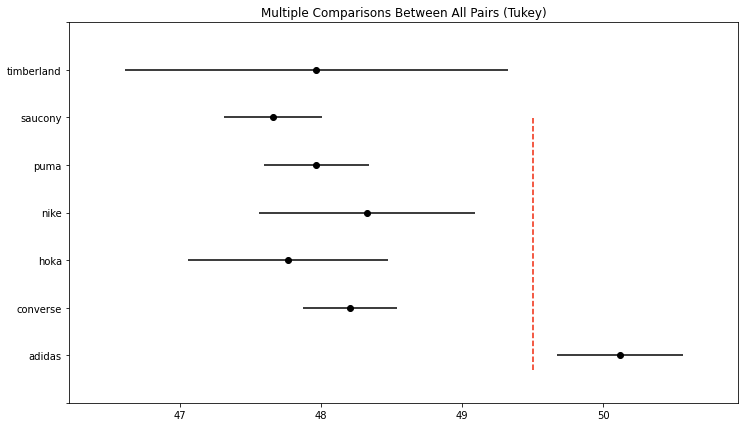

In [12]:
tukey = pairwise_tukeyhsd(endog = marathon_times, groups = shoe_brands, alpha = 0.05)

# plotting group confidence intervals
tukey.plot_simultaneous(figsize = (12, 7))    
plt.vlines(x = 49.5, ymin = -0.3, ymax = 5, color = "#F0260A", linestyles = "dashed")
tukey.summary()

# x - indexes where to plot the lines.
# ymin, ymax - Respective beginning and end of each line. If scalars are provided, all lines will have same length.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2F6966;font-family:sans-serif;color:#fff;font-size:170%;text-align:center;border-radius:1px 1px;"> Conclusion</p>

> <div class="alert alert-block alert-success">
<b>Interpreting the results:</b> Magnificient !!! Everything is clear from the results of the Tukey test. By looking at the results of this test, we can see whether we can reject the null hypothesis for each pair of the groups on the significance level we consider, also we can see the confidence intervals and the mean differences. This test shows us that the adidas group is significantly different from the others</div>

## Thank you for your valuable time and attention 🪁